Loaded image: input.jpg
Image shape: (334, 334, 3)
Image type: Color (RGB)
STARTING IMAGE PROCESSING TASKS
Processing in COLOR mode

TASK 1: INTENSITY LEVEL REDUCTION
Saved: results/task1_intensity_2_levels.png
✓ Reduced to 2 intensity levels
Saved: results/task1_intensity_4_levels.png
✓ Reduced to 4 intensity levels
Saved: results/task1_intensity_8_levels.png
✓ Reduced to 8 intensity levels
Saved: results/task1_intensity_16_levels.png
✓ Reduced to 16 intensity levels
Saved: results/task1_intensity_32_levels.png
✓ Reduced to 32 intensity levels
Saved: results/task1_intensity_64_levels.png
✓ Reduced to 64 intensity levels
Saved: results/task1_intensity_128_levels.png
✓ Reduced to 128 intensity levels


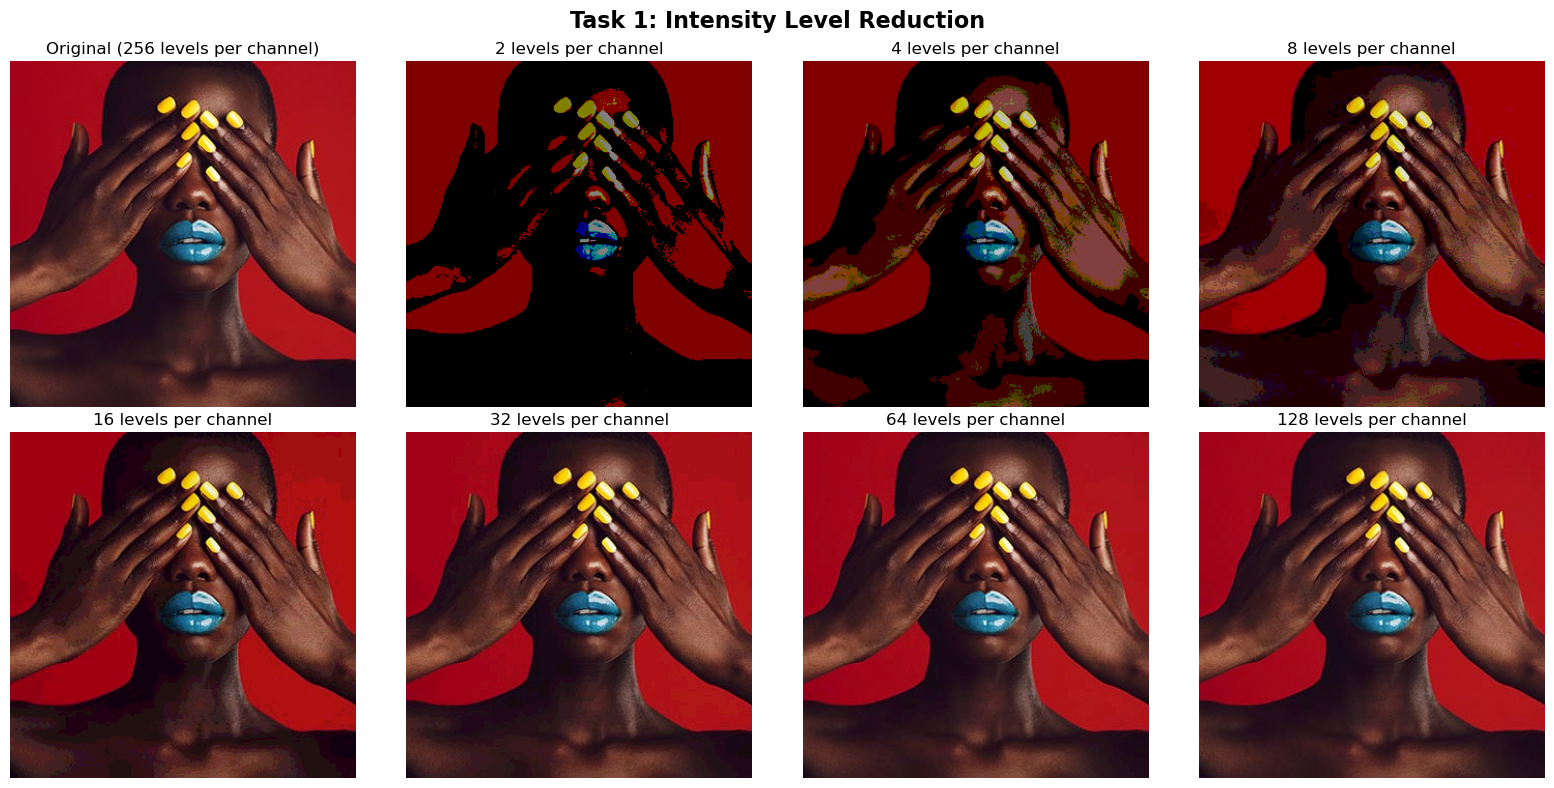

Saved: results/original_image.png

TASK 2: SPATIAL AVERAGING
Saved: results/task2_spatial_avg_3x3.png
✓ Applied 3×3 spatial averaging
Saved: results/task2_spatial_avg_10x10.png
✓ Applied 10×10 spatial averaging
Saved: results/task2_spatial_avg_20x20.png
✓ Applied 20×20 spatial averaging


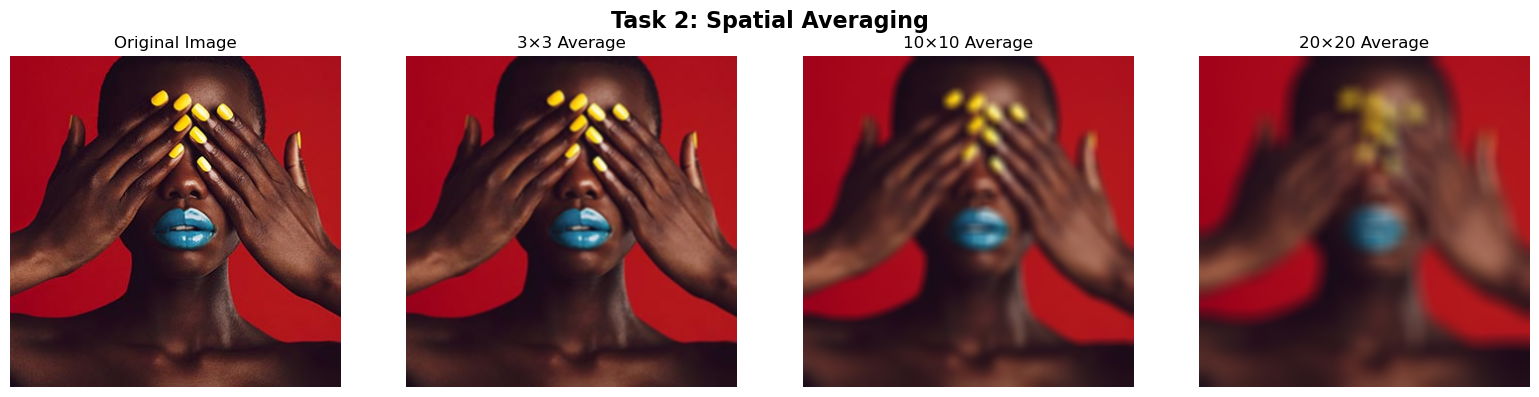


TASK 3: IMAGE ROTATION
Saved: results/task3_rotated_45_degrees.png
✓ Rotated image by 45 degrees
Saved: results/task3_rotated_90_degrees.png
✓ Rotated image by 90 degrees


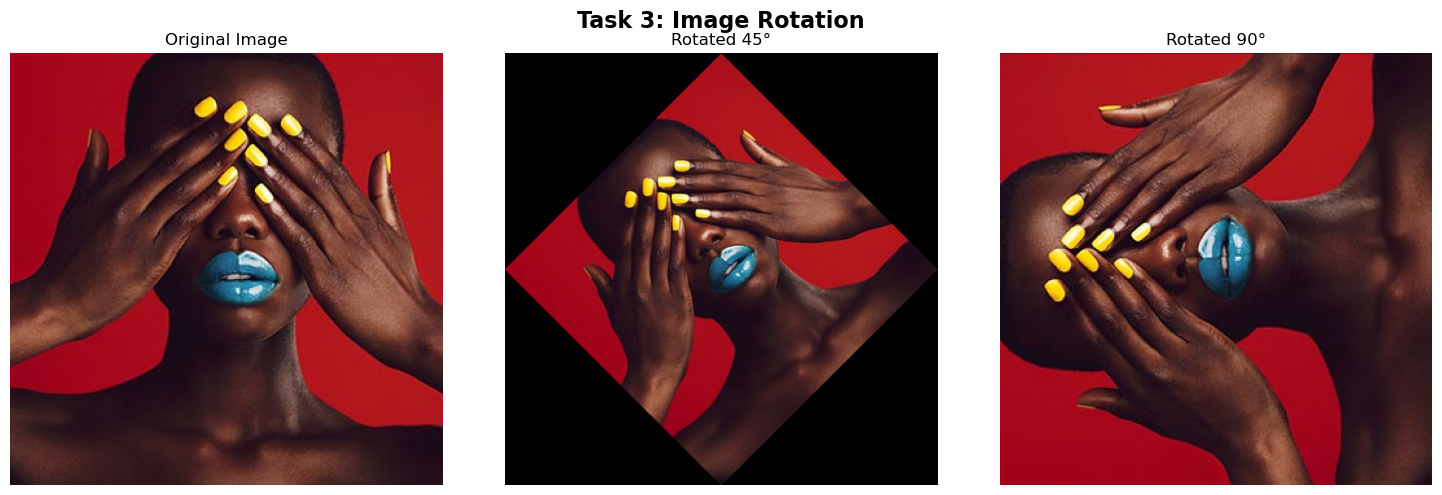


TASK 4: BLOCK AVERAGING (SPATIAL RESOLUTION REDUCTION)
Saved: results/task4_block_avg_3x3.png
✓ Applied 3×3 block averaging
Saved: results/task4_block_avg_5x5.png
✓ Applied 5×5 block averaging
Saved: results/task4_block_avg_7x7.png
✓ Applied 7×7 block averaging


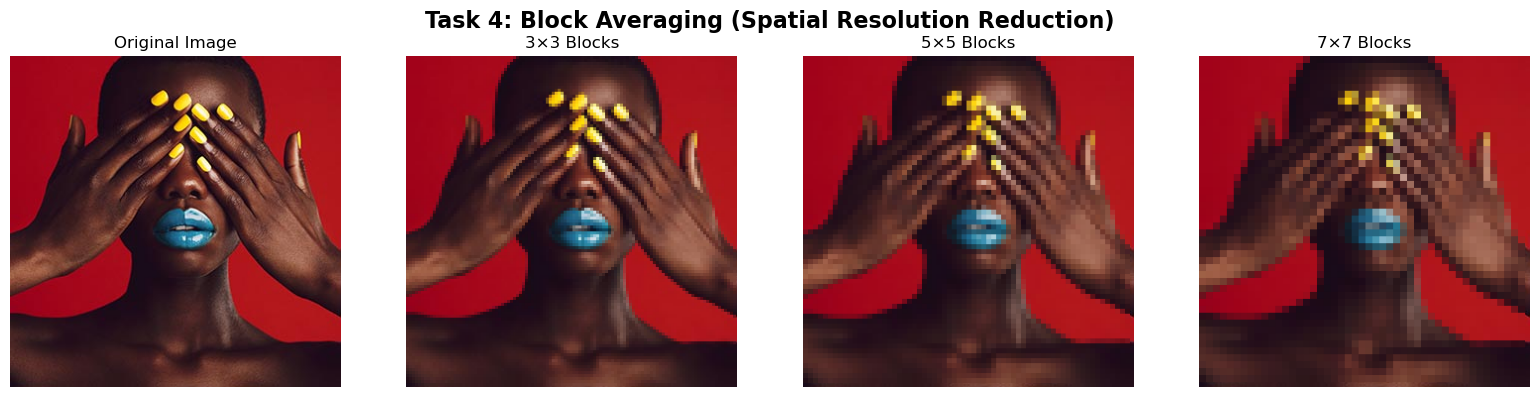


ALL TASKS COMPLETED!
Results saved in 'results/' directory


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

class ImageProcessor:
    def __init__(self, image_path, use_color=True):
        """Initialize with input image"""
        self.use_color = use_color
        self.original_image = self.load_image(image_path)
        print(f"Loaded image: {image_path}")
        print(f"Image shape: {self.original_image.shape}")
        print(f"Image type: {'Color (RGB)' if len(self.original_image.shape) == 3 else 'Grayscale'}")
        
    def load_image(self, image_path):
        """Load image in color or grayscale"""
        if self.use_color:
            image = cv2.imread(image_path)
            if image is None:
                raise ValueError(f"Could not load image from {image_path}")
            # Convert BGR to RGB for proper display
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                raise ValueError(f"Could not load image from {image_path}")
        return image
    
    def save_image(self, image, filename):
        """Save image to results directory"""
        if not os.path.exists('results'):
            os.makedirs('results')
        
        if len(image.shape) == 3:  # Color image
            # Convert RGB back to BGR for saving
            image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'results/{filename}', image_bgr)
        else:  # Grayscale image
            cv2.imwrite(f'results/{filename}', image)
        print(f"Saved: results/{filename}")

    # =============== TASK 1: INTENSITY LEVEL REDUCTION ===============
    def task1_intensity_reduction(self):
        """Task 1: Reduce intensity levels from 256 to powers of 2"""
        print("\n" + "="*60)
        print("TASK 1: INTENSITY LEVEL REDUCTION")
        print("="*60)
        
        # Powers of 2 to test: 2, 4, 8, 16, 32, 64, 128
        levels_list = [2, 4, 8, 16, 32, 64, 128]
        
        # Create subplot grid
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        axes = axes.flatten()
        
        # Show original image
        if len(self.original_image.shape) == 3:
            axes[0].imshow(self.original_image)
            axes[0].set_title('Original (256 levels per channel)')
        else:
            axes[0].imshow(self.original_image, cmap='gray')
            axes[0].set_title('Original (256 levels)')
        axes[0].axis('off')
        
        # Process each intensity level
        for i, levels in enumerate(levels_list):
            reduced_image = self.intensity_level_reduction(self.original_image, levels)
            
            # Display
            if len(reduced_image.shape) == 3:
                axes[i+1].imshow(reduced_image)
                axes[i+1].set_title(f'{levels} levels per channel')
            else:
                axes[i+1].imshow(reduced_image, cmap='gray')
                axes[i+1].set_title(f'{levels} intensity levels')
            axes[i+1].axis('off')
            
            # Save image
            self.save_image(reduced_image, f'task1_intensity_{levels}_levels.png')
            
            print(f"✓ Reduced to {levels} intensity levels")
        
        plt.suptitle('Task 1: Intensity Level Reduction', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Save original for reference
        self.save_image(self.original_image, 'original_image.png')
    
    def intensity_level_reduction(self, image, num_levels):
        """Reduce intensity levels to specified power of 2"""
        # Validate power of 2
        if num_levels <= 0 or (num_levels & (num_levels - 1)) != 0:
            raise ValueError("Number of levels must be a positive power of 2")
        
        # Calculate quantization factor
        quantization_factor = 256 // num_levels
        
        # For color images, apply to each channel
        if len(image.shape) == 3:
            # Process each channel separately
            quantized_image = np.zeros_like(image)
            for channel in range(3):
                quantized_image[:, :, channel] = (image[:, :, channel] // quantization_factor) * quantization_factor
        else:
            # Grayscale processing
            quantized_image = (image // quantization_factor) * quantization_factor
        
        # Ensure values are in valid range
        quantized_image = np.clip(quantized_image, 0, 255).astype(np.uint8)
        
        return quantized_image

    # =============== TASK 2: SPATIAL AVERAGING ===============
    def task2_spatial_averaging(self):
        """Task 2: Spatial averaging with 3x3, 10x10, and 20x20 neighborhoods"""
        print("\n" + "="*60)
        print("TASK 2: SPATIAL AVERAGING")
        print("="*60)
        
        kernel_sizes = [3, 10, 20]
        
        # Create subplot grid
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        
        # Show original image
        if len(self.original_image.shape) == 3:
            axes[0].imshow(self.original_image)
        else:
            axes[0].imshow(self.original_image, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        
        # Process each kernel size
        for i, kernel_size in enumerate(kernel_sizes):
            averaged_image = self.spatial_averaging(self.original_image, kernel_size)
            
            # Display
            if len(averaged_image.shape) == 3:
                axes[i+1].imshow(averaged_image)
            else:
                axes[i+1].imshow(averaged_image, cmap='gray')
            axes[i+1].set_title(f'{kernel_size}×{kernel_size} Average')
            axes[i+1].axis('off')
            
            # Save image
            self.save_image(averaged_image, f'task2_spatial_avg_{kernel_size}x{kernel_size}.png')
            
            print(f"✓ Applied {kernel_size}×{kernel_size} spatial averaging")
        
        plt.suptitle('Task 2: Spatial Averaging', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def spatial_averaging(self, image, kernel_size):
        """Apply spatial averaging with specified kernel size"""
        # Create averaging kernel
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
        
        # For color images, apply to each channel
        if len(image.shape) == 3:
            averaged_image = np.zeros_like(image)
            for channel in range(3):
                averaged_image[:, :, channel] = cv2.filter2D(image[:, :, channel], -1, kernel)
        else:
            # Grayscale processing
            averaged_image = cv2.filter2D(image, -1, kernel)
        
        return averaged_image.astype(np.uint8)

    # =============== TASK 3: IMAGE ROTATION ===============
    def task3_image_rotation(self):
        """Task 3: Rotate image by 45 and 90 degrees"""
        print("\n" + "="*60)
        print("TASK 3: IMAGE ROTATION")
        print("="*60)
        
        angles = [45, 90]
        
        # Create subplot grid
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Show original image
        if len(self.original_image.shape) == 3:
            axes[0].imshow(self.original_image)
        else:
            axes[0].imshow(self.original_image, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        
        # Process each rotation angle
        for i, angle in enumerate(angles):
            rotated_image = self.rotate_image(self.original_image, angle)
            
            # Display
            if len(rotated_image.shape) == 3:
                axes[i+1].imshow(rotated_image)
            else:
                axes[i+1].imshow(rotated_image, cmap='gray')
            axes[i+1].set_title(f'Rotated {angle}°')
            axes[i+1].axis('off')
            
            # Save image
            self.save_image(rotated_image, f'task3_rotated_{angle}_degrees.png')
            
            print(f"✓ Rotated image by {angle} degrees")
        
        plt.suptitle('Task 3: Image Rotation', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def rotate_image(self, image, angle):
        """Rotate image by specified angle"""
        if len(image.shape) == 3:
            height, width, _ = image.shape
        else:
            height, width = image.shape
        
        center = (width // 2, height // 2)
        
        # Get rotation matrix
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        
        # Calculate new bounding dimensions to prevent cropping
        cos_angle = abs(rotation_matrix[0, 0])
        sin_angle = abs(rotation_matrix[0, 1])
        new_width = int((height * sin_angle) + (width * cos_angle))
        new_height = int((height * cos_angle) + (width * sin_angle))
        
        # Adjust rotation matrix for new center
        rotation_matrix[0, 2] += (new_width / 2) - center[0]
        rotation_matrix[1, 2] += (new_height / 2) - center[1]
        
        # Perform rotation
        rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))
        
        return rotated_image

    # =============== TASK 4: BLOCK AVERAGING ===============
    def task4_block_averaging(self):
        """Task 4: Block averaging with 3x3, 5x5, and 7x7 blocks"""
        print("\n" + "="*60)
        print("TASK 4: BLOCK AVERAGING (SPATIAL RESOLUTION REDUCTION)")
        print("="*60)
        
        block_sizes = [3, 5, 7]
        
        # Create subplot grid
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        
        # Show original image
        if len(self.original_image.shape) == 3:
            axes[0].imshow(self.original_image)
        else:
            axes[0].imshow(self.original_image, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        
        # Process each block size
        for i, block_size in enumerate(block_sizes):
            block_averaged_image = self.block_averaging(self.original_image, block_size)
            
            # Display
            if len(block_averaged_image.shape) == 3:
                axes[i+1].imshow(block_averaged_image)
            else:
                axes[i+1].imshow(block_averaged_image, cmap='gray')
            axes[i+1].set_title(f'{block_size}×{block_size} Blocks')
            axes[i+1].axis('off')
            
            # Save image
            self.save_image(block_averaged_image, f'task4_block_avg_{block_size}x{block_size}.png')
            
            print(f"✓ Applied {block_size}×{block_size} block averaging")
        
        plt.suptitle('Task 4: Block Averaging (Spatial Resolution Reduction)', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def block_averaging(self, image, block_size):
        """Replace non-overlapping blocks with their average value"""
        if len(image.shape) == 3:
            height, width, channels = image.shape
            result = image.copy().astype(np.float64)
            
            # Process non-overlapping blocks for each channel
            for i in range(0, height - block_size + 1, block_size):
                for j in range(0, width - block_size + 1, block_size):
                    # Extract block for all channels
                    block = image[i:i+block_size, j:j+block_size, :]
                    
                    # Calculate average for each channel
                    for c in range(channels):
                        block_average = np.mean(block[:, :, c])
                        result[i:i+block_size, j:j+block_size, c] = block_average
        else:
            height, width = image.shape
            result = image.copy().astype(np.float64)
            
            # Process non-overlapping blocks
            for i in range(0, height - block_size + 1, block_size):
                for j in range(0, width - block_size + 1, block_size):
                    # Extract block
                    block = image[i:i+block_size, j:j+block_size]
                    
                    # Calculate average
                    block_average = np.mean(block)
                    
                    # Replace all pixels in block with average
                    result[i:i+block_size, j:j+block_size] = block_average
        
        return result.astype(np.uint8)

    def run_all_tasks(self):
        """Execute all tasks in order"""
        print("STARTING IMAGE PROCESSING TASKS")
        print(f"Processing in {'COLOR' if self.use_color else 'GRAYSCALE'} mode")
        print("="*60)
        
        # Task 1: Intensity Level Reduction
        self.task1_intensity_reduction()
        
        # Task 2: Spatial Averaging
        self.task2_spatial_averaging()
        
        # Task 3: Image Rotation
        self.task3_image_rotation()
        
        # Task 4: Block Averaging
        self.task4_block_averaging()
        
        print("\n" + "="*60)
        print("ALL TASKS COMPLETED!")
        print("Results saved in 'results/' directory")
        print("="*60)

# =============== MAIN EXECUTION ===============
def main():
    """Main function - Replace 'your_image.jpg' with your actual image path"""
    
    # IMPORTANT: Replace this with your actual image path
    IMAGE_PATH = "input.jpg"  
    
    # Choose processing mode
    USE_COLOR = True  # Set to False for grayscale processing
    
    try:
        # Initialize processor with your image
        processor = ImageProcessor(IMAGE_PATH, use_color=USE_COLOR)
        
        # Run all tasks in sequence
        processor.run_all_tasks()
        
    except Exception as e:
        print(f"Error: {e}")
        print("\nMake sure to:")
        print("1. Replace 'your_image.jpg' with your actual image path")
        print("2. Ensure the image file exists")
        print("3. Check that the image format is supported (jpg, png, bmp, etc.)")

# =============== PROCESSING MODE FUNCTIONS ===============
def process_color_image(image_path):
    """Process image in color mode"""
    processor = ImageProcessor(image_path, use_color=True)
    processor.run_all_tasks()

def process_grayscale_image(image_path):
    """Process image in grayscale mode"""
    processor = ImageProcessor(image_path, use_color=False)
    processor.run_all_tasks()

if __name__ == "__main__":
    main()